<a href="https://colab.research.google.com/github/MagnoSales/TELECOMX2_DESAFIO/blob/main/5_Aplicando_o_Modelo_TELECOMX2_DESAFIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importação de bibliotecas essenciais para análise e visualização de dados

#Importando Arquivo para trabalhar

In [63]:
# Define a URL do arquivo CSV no GitHub
url = "https://raw.githubusercontent.com/MagnoSales/TELECOMX2_DESAFIO/refs/heads/main/DataSet/dados_tratados.csv"

# Carrega o arquivo CSV em um DataFrame pandas
df = pd.read_csv(url)

# Garante que a variável df é um DataFrame (opcional, pois read_csv já retorna um DataFrame)
df = pd.DataFrame(df)

# Exibe as primeiras linhas do DataFrame para verificar o carregamento
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


#Preparação dos Dados

In [64]:
# Exibe o número de linhas e colunas do DataFrame
df.shape

(7043, 22)

In [65]:
# Exibe informações sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [66]:
# Verifica e imprime o número de valores nulos em cada coluna
print("Numero de Nulos", df.isnull().sum())

Numero de Nulos customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [67]:
# Substitui os valores nulos nas colunas 'Total.Day' e 'account.Charges.Total' por zero
df['Total.Day'] = df['Total.Day'].fillna(0)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Verifica novamente a contagem de valores nulos nas colunas modificadas para confirmar a substituição
print("Numero de Nulos apos substituicao:\n",df[['Total.Day', 'account.Charges.Total']].isnull().sum())

Numero de Nulos apos substituicao:
 Total.Day                0
account.Charges.Total    0
dtype: int64


#Remoção de Colunas Irrelevantes

In [68]:
# Cria um novo DataFrame removendo a coluna 'customerID', considerada irrelevante para o modelo
df_clean = df.drop(['customerID'],axis=1)

#Encoding

In [69]:
# Verifique se há valores únicos em cada coluna
for col in df_clean.columns:
  print(f"valores únicos na coluna'{col}': {df_clean[col].nunique()}")
  if df_clean[col].nunique() < 80: # Imprima os valores somente se não houver muitos
    print(df_clean[col].unique())
  print('-' * 80)  # Linha divisória para melhor visualização

valores únicos na coluna'Churn': 2
['No' 'Yes']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------------------------------------
valores únicos na coluna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
-----------------------------------

In [70]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [71]:
colunas = df_clean.columns

In [72]:
# Pegar apenas colunas categóricas (object/string)
colunas_categoricas = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

In [73]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),
     colunas_categoricas),
    remainder='passthrough',  # Mantém as colunas numéricas como estão
    sparse_threshold=0
)

In [74]:
df_clean = one_hot.fit_transform(df_clean)

In [75]:
dados = pd.DataFrame(df_clean, columns = one_hot.get_feature_names_out(colunas)).copy()
dados.head(2)

,onehotencoder__Churn_Yes,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,2.20,65.6,593.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.01,59.9,542.4


In [76]:
dados.shape

(7043, 42)

#Verificação da Proporção de Evasão

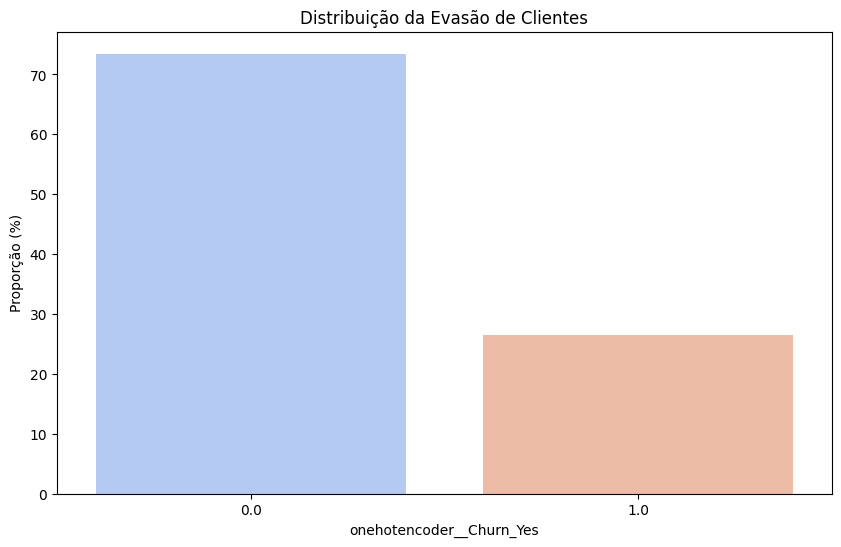


 FREQUENCIA ABSOLUTA:
-----------------------
onehotencoder__Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64
-

 PROPORÇÃO (%):
-----------------
onehotencoder__Churn_Yes
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64
-



In [77]:
# Proporção gráfica da Evasão
frequencia = dados['onehotencoder__Churn_Yes'].value_counts()
proporcao = dados['onehotencoder__Churn_Yes'].value_counts(normalize=True) * 100

# Visualizar com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao.index, y=proporcao.values, hue=proporcao.index, palette='coolwarm', legend=False)
plt.ylabel('Proporção (%)')
plt.title('Distribuição da Evasão de Clientes')
plt.show()

# Exibir os resultados
print("\n FREQUENCIA ABSOLUTA:")
print("-" * 23)
print(frequencia)
print("-\n" * 1)
print(" PROPORÇÃO (%):")
print("-" * 17)
print(proporcao)
print("-\n")

Resultado mostra que o modelo está desbalanceado. Classe 1 é menor que 30%. É necessário balancear.

#Dividindo os dados em conjunto de treino e testes

In [78]:
x = dados.drop('onehotencoder__Churn_Yes', axis =1)
y = dados['onehotencoder__Churn_Yes']

In [79]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 42)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 42)

#Modelo de Baseline
Antes de iniciar o treinamento de modelos mais complexos, é uma boa prática estabelecer um modelo de baseline simples. Isso nos dá um ponto de comparação para avaliar o desempenho de modelos subsequentes. Um modelo de baseline comum para problemas de classificação desbalanceada como este é um modelo que prevê a classe majoritária para todas as instâncias.

#### Por que um Modelo de Baseline é Importante?

* **Ponto de Referência:** Ele fornece um desempenho mínimo que qualquer modelo mais sofisticado deve superar. Se o seu modelo complexo não superar o baseline, há algo fundamentalmente errado.
* **Identificação de Problemas:** Se o baseline já tem um desempenho razoável (neste caso, prevendo a classe majoritária), isso pode indicar que a tarefa é relativamente fácil ou que a métrica escolhida (como acurácia em dados desbalanceados) pode ser enganosa.
* **Economia de Tempo:** Evita gastar tempo e recursos em modelos complexos que podem não ser necessários ou não trazer melhorias significativas.

#### Criando o Modelo de Baseline (Classe Majoritária)

Como a análise anterior mostrou que a classe majoritária é "No Churn" (0.0), nosso modelo de baseline simplesmente preverá "No Churn" para todos os clientes.

In [80]:
# Previsão do modelo de baseline: prever a classe majoritária (0.0 - No Churn) para todos
y_previsto_baseline = [0.0] * len(y_teste)

#### Avaliando o Modelo de Baseline

Vamos avaliar o desempenho do modelo de baseline usando as mesmas métricas que usamos para a Árvore de Decisão, focando na matriz de confusão e no relatório de classificação, que são mais informativos para dados desbalanceados.

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay, classification_report

Matriz de Confusão do Modelo de Baseline:
[[777   0]
 [280   0]] 



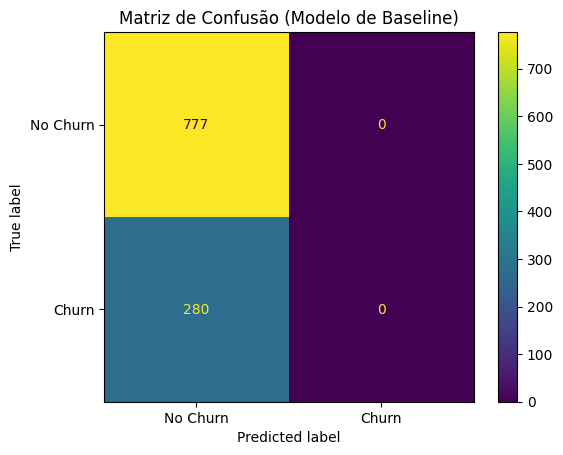


Relatório de Classificação do Modelo de Baseline:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       777
         1.0       1.00      0.00      0.00       280

    accuracy                           0.74      1057
   macro avg       0.87      0.50      0.42      1057
weighted avg       0.81      0.74      0.62      1057



In [82]:
# Calcula e exibe a matriz de confusão para o baseline
matriz_confusao_baseline = confusion_matrix(y_teste, y_previsto_baseline)
print("Matriz de Confusão do Modelo de Baseline:")
print(matriz_confusao_baseline,'\n')

# Visualiza a matriz de confusão do baseline
visualizacao_baseline = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_baseline, display_labels=['No Churn', 'Churn'])
visualizacao_baseline.plot()
plt.title('Matriz de Confusão (Modelo de Baseline)')
plt.show()

# Relatório de classificação completo para o baseline
print("\nRelatório de Classificação do Modelo de Baseline:")
print(classification_report(y_teste, y_previsto_baseline, zero_division=1))

#Balanceando dados

In [83]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

y_balanceado.value_counts(normalize= True)

,proportion
onehotencoder__Churn_Yes,
0.0,0.5
1.0,0.5


#Normalização

In [84]:
from sklearn.preprocessing import StandardScaler

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta o scaler nos dados de treino BALANCEADOS e transforma os dados de treino balanceados
x_balanceado_scaled = scaler.fit_transform(x_balanceado)

# Transforma os dados de validação e teste usando o scaler ajustado nos dados de treino balanceados
x_val_scaled = scaler.transform(x_val)
x_teste_scaled = scaler.transform(x_teste)

# Converter de volta para DataFrame para manter nomes das colunas (útil para visualização ou análise)
x_balanceado_scaled = pd.DataFrame(x_balanceado_scaled, columns=x_treino.columns)
x_val_scaled = pd.DataFrame(x_val_scaled, columns=x_val.columns)
x_teste_scaled = pd.DataFrame(x_teste_scaled, columns=x_teste.columns)


print("Dados de treino balanceados padronizados:")
display(x_balanceado_scaled.head())

print("\nDados de validação padronizados:")
display(x_val_scaled.head())

print("\nDados de teste padronizados:")
display(x_teste_scaled.head())

Dados de treino balanceados padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-0.508429,-0.150143,-0.317582,-0.483468
1,-1.048618,-0.918859,-0.610713,0.326235,-0.992730,-0.326235,1.189289,1.514031,-1.063726,-0.445379,...,0.760574,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-0.424591,-0.097738,0.035564,-0.412541
2,-1.048618,-0.918859,-0.610713,0.326235,-0.992730,-0.326235,1.189289,-0.680286,0.959799,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-0.131154,0.918917,0.757670,0.121720
3,-1.048618,1.186046,1.772896,-3.243088,-0.992730,3.243088,-0.899408,1.514031,-1.063726,-0.445379,...,0.760574,-0.496101,2.192939,-0.887190,-0.538003,-0.51005,-0.089235,-0.275915,-0.329881,-0.229411
4,-1.048618,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,-1.413290,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-1.095302,0.290058,0.293836,-0.891258



Dados de validação padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-0.927624,-0.831407,-0.814798,-0.824391
1,1.053290,-0.918859,-0.610713,-3.243088,-0.992730,3.243088,-0.899408,1.514031,-1.063726,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,-0.676107,-1.020064,-1.136319,-0.729427
2,-1.048618,-0.918859,1.772896,0.326235,-0.992730,-0.326235,1.189289,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-0.382671,-0.443610,-0.363263,-0.466044
3,-1.048618,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.51005,0.036524,0.405349,0.458989,0.106755
4,1.053290,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,-1.063726,2.265415,...,-1.413290,-0.496101,-0.491765,-0.887190,1.987875,-0.51005,-1.095302,-1.648923,-1.665160,-0.917127



Dados de teste padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,1.186046,1.772896,-3.243088,-0.992730,3.243088,-0.899408,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,2.192939,-0.887190,-0.538003,-0.510050,-0.634188,-1.072469,-1.224167,-0.720309
1,-1.048618,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,-1.413290,-0.496101,-0.491765,1.238215,-0.538003,-0.510050,0.120363,0.583526,0.648739,0.251045
2,1.053290,1.186046,1.772896,0.326235,1.084141,-0.326235,-0.899408,-0.680286,-1.063726,2.265415,...,0.760574,-0.496101,-0.491765,-0.887190,1.987875,-0.510050,0.078443,-1.586037,-1.663403,-0.622816
3,-1.048618,1.186046,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,0.760574,2.165256,-0.491765,-0.887190,-0.538003,2.223091,1.839061,1.516333,1.465719,2.741123
4,-1.048618,1.186046,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,-1.063726,2.265415,...,-1.413290,-0.496101,2.192939,-0.887190,-0.538003,-0.510050,1.839061,-1.690847,-1.691515,-0.286510


# Treinando a Árvore de Decisão com Dados Balanceados e Padronizados

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay, classification_report

# Inicializa o modelo (você pode manter o max_depth=10 que usou anteriormente)
modelo_balanceado_scaled = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treina o modelo com os dados de treino balanceados e padronizados
modelo_balanceado_scaled.fit(x_balanceado_scaled, y_balanceado)

print("Modelo treinado com dados balanceados e padronizados.")

Modelo treinado com dados balanceados e padronizados.


# Avaliando o Modelo com Dados de Validação Padronizados

Matriz de Confusão:
[[932 168]
 [182 215]] 



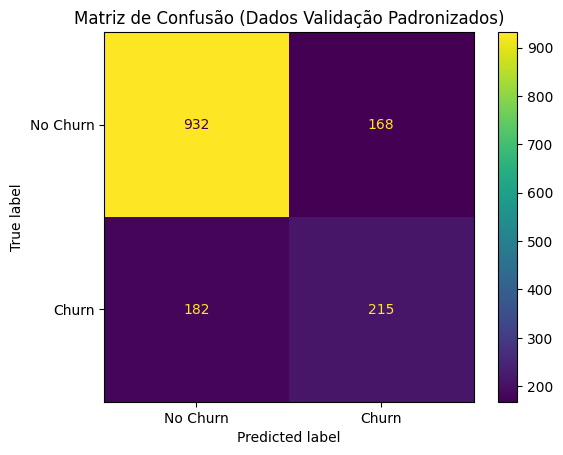

In [86]:
# Faz previsões nos dados de validação padronizados
y_previsto_scaled = modelo_balanceado_scaled.predict(x_val_scaled)

# Calcula e exibe a matriz de confusão
matriz_confusao_scaled = confusion_matrix(y_val, y_previsto_scaled)
print("Matriz de Confusão:")
print(matriz_confusao_scaled,'\n')

# Visualiza a matriz de confusão
visualizacao_scaled = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_scaled, display_labels=['No Churn', 'Churn'])
visualizacao_scaled.plot()
plt.title('Matriz de Confusão (Dados Validação Padronizados)')
plt.show()

Superior Esquerdo (932): True Negative (Verdadeiro Negativo): O modelo previu "No Churn" e o valor real era "No Churn". Isso significa que 932 clientes que não iriam abandonar foram corretamente identificados como "No Churn".

Superior Direito (168): False Positive (Falso Positivo) ou Erro Tipo I: O modelo previu "Churn", mas o valor real era "No Churn". Isso significa que 168 clientes que não iriam abandonar foram incorretamente classificados como "Churn".

Inferior Esquerdo (182): False Negative (Falso Negativo) ou Erro Tipo II: O modelo previu "No Churn", mas o valor real era "Churn". Isso significa que 182 clientes que iriam abandonar foram incorretamente classificados como "No Churn".

Inferior Direito (215): True Positive (Verdadeiro Positivo): O modelo previu "Churn" e o valor real era "Churn". Isso significa que 215 clientes que iriam abandonar foram corretamente identificados como "Churn".

# Métricas de Avaliação (Dados de Validação Padronizados)

In [87]:
# Calcula e exibe as métricas de avaliação
print(f'Acurácia: {accuracy_score(y_val, y_previsto_scaled)}')
print(f'Precisão: {precision_score(y_val, y_previsto_scaled)}')
print(f'Recall  : {recall_score(y_val, y_previsto_scaled)}')
print(f'F1-score: {f1_score(y_val, y_previsto_scaled)}')
print(f'AUC     : {roc_auc_score(y_val, y_previsto_scaled)}')
print(f'AP      : {average_precision_score(y_val, y_previsto_scaled)}')

# Relatório de classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_previsto_scaled))

Acurácia: 0.7661990647962592
Precisão: 0.5613577023498695
Recall  : 0.5415617128463476
F1-score: 0.5512820512820513
AUC     : 0.6944172200595374
AP      : 0.42558632511003075

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1100
         1.0       0.56      0.54      0.55       397

    accuracy                           0.77      1497
   macro avg       0.70      0.69      0.70      1497
weighted avg       0.76      0.77      0.76      1497



In [88]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.8926264201381154
Acurácia de validação: 0.7668670674682698


# Curvas ROC e Precisão-Recall (Dados de Validação Padronizados)

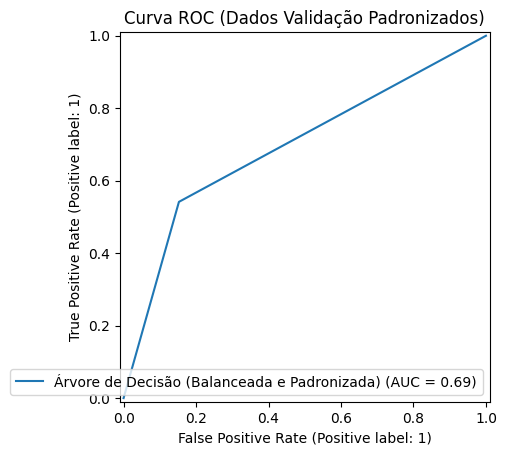

In [89]:
# Curva ROC
RocCurveDisplay.from_predictions(y_val, y_previsto_scaled, name='Árvore de Decisão (Balanceada e Padronizada)');
plt.title('Curva ROC (Dados Validação Padronizados)')
plt.show()

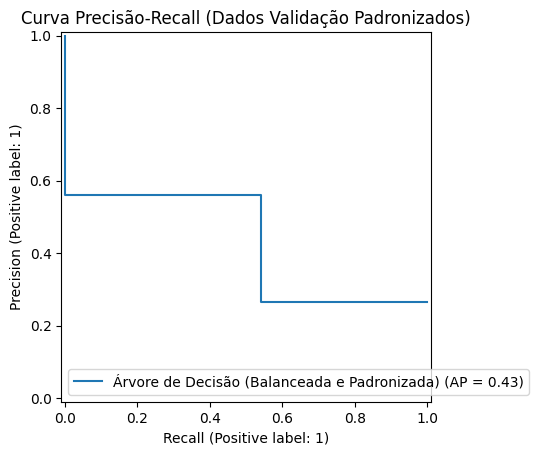

In [90]:
# Curva de Precisão-Recall
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_scaled, name='Árvore de Decisão (Balanceada e Padronizada)');
print('\n')
plt.title('Curva Precisão-Recall (Dados Validação Padronizados)')
plt.show()

#Validação cruzada

Usando o KFold

In [91]:
from sklearn.model_selection import cross_validate, KFold

In [92]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [93]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
cv_resultados

{'fit_time': array([0.06094027, 0.05766582, 0.0615766 , 0.05941439, 0.059829  ]),
 'score_time': array([0.0225606 , 0.02221394, 0.02234793, 0.02121925, 0.02154422]),
 'test_accuracy': array([0.74791319, 0.75438596, 0.78111947, 0.78529657, 0.75438596]),
 'test_precision': array([0.52351097, 0.56747405, 0.59245283, 0.60784314, 0.53055556]),
 'test_recall': array([0.52681388, 0.49249249, 0.50482315, 0.49679487, 0.60443038]),
 'test_f1': array([0.52515723, 0.52733119, 0.54513889, 0.54673721, 0.56508876]),
 'test_roc_auc': array([0.72438475, 0.74751314, 0.76875549, 0.73739497, 0.74933368])}

In [94]:
def intervalo_conf_multi(resultados, metricas):
    print("Intervalos de Confiança (Validação Cruzada com KFold):")
    print("-" * 60)
    for metric in metricas:
        media = resultados[f'test_{metric}'].mean()
        desvio_padrao = resultados[f'test_{metric}'].std()
        print(f'{metric.capitalize():<10}: [{media - 2*desvio_padrao:.4f}, {min(media + 2*desvio_padrao, 1):.4f}]')
    print("-" * 60)

metricas_avaliadas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
intervalo_conf_multi(cv_resultados, metricas_avaliadas)

Intervalos de Confiança (Validação Cruzada com KFold):
------------------------------------------------------------
Accuracy  : [0.7338, 0.7955]
Precision : [0.4980, 0.6307]
Recall    : [0.4423, 0.6079]
F1        : [0.5127, 0.5711]
Roc_auc   : [0.7162, 0.7747]
------------------------------------------------------------


Relatório da Validação Cruzada com KFold:

A validação cruzada com 5 folds e random_state=42 foi realizada usando uma Árvore de Decisão com profundidade máxima de 10. As métricas avaliadas foram acurácia, precisão, recall, F1-score e AUC.

Os resultados médios e os intervalos de confiança aproximados (média ± 2 desvios padrão) nos diferentes folds foram:

Acurácia: Variou entre aproximadamente 73.62% e 79.54%.
Precisão: Variou entre aproximadamente 49.72% e 63.77%. Indica a proporção de clientes classificados como "Churn" que realmente cancelaram.
Recall: Variou entre aproximadamente 43.47% e 61.46%. Indica a proporção de clientes que realmente cancelaram e foram corretamente identificados pelo modelo (Taxa de Verdadeiro Positivo).
F1-score: Variou entre aproximadamente 50.97% e 57.58%.
AUC: Variou entre aproximadamente 71.79% e 77.78%.

Estes resultados confirmam que o modelo tem uma capacidade razoável de prever churn, mas há espaço para melhoria, especialmente nas métricas de Precisão e Recall, que são cruciais para identificar corretamente os clientes que irão cancelar e evitar classificar incorretamente os que não irão.

#Estratificando os dados

##Avaliação do desempenho com os dados originais

In [95]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.0632515 , 0.05912304, 0.06150794, 0.06006098, 0.06487036]),
 'score_time': array([0.00726843, 0.00715971, 0.00715137, 0.00705743, 0.00745988]),
 'test_score': array([0.49056604, 0.57413249, 0.48113208, 0.50314465, 0.52201258])}

In [96]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.4483054591602089, 0.580089676049997]


##Avaliação do desemplenho com os dados balancedos

In [97]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state=42)
cv_resultados = cross_validate(modelo,x_balanceado,y_balanceado, cv= skf, scoring='recall')
cv_resultados

{'fit_time': array([0.10098863, 0.09614491, 0.09196067, 0.08577108, 0.10157132]),
 'score_time': array([0.00892043, 0.00897431, 0.00906396, 0.01119852, 0.00851488]),
 'test_score': array([0.81335357, 0.82852807, 0.81212121, 0.81363636, 0.82701062])}

In [98]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.8044276020003858, 0.8334323327032513]


#Hiperparâmetros

In [99]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# 1. Definir o espaço de hiperparâmetros
param_grid = {
    'max_depth': [5, 10, 15, 20, None], # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4], # Número mínimo de amostras necessárias para estar em um nó folha
    'criterion': ['gini', 'entropy'] # Função para medir a qualidade de uma divisão
}

# 2. Configurar o Grid Search
# Usar StratifiedKFold para validação cruzada em dados desbalanceados
# Definir a métrica de pontuação a ser otimizada (Recall é uma boa escolha para churn)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',  # Otimizar para Recall
    cv=skf,
    n_jobs=-1,
    verbose=1
)

print("Configuração do Grid Search completa. Próximo passo: executar o Grid Search.")

Configuração do Grid Search completa. Próximo passo: executar o Grid Search.


In [100]:
# 3. Executar o Grid Search
# Ajustar o Grid Search aos dados de treino balanceados e padronizados
print("Executando Grid Search... ")
grid_search.fit(x_balanceado_scaled, y_balanceado)

print("\nGrid Search concluído.")

# 4. Identificar os melhores hiperparâmetros e modelo
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor score (Recall) da validação cruzada:")
print(grid_search.best_score_)

# O melhor modelo treinado está disponível em grid_search.best_estimator_
melhor_modelo = grid_search.best_estimator_
print("\nMelhor modelo treinado obtido.")

Executando Grid Search... 
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Grid Search concluído.

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Melhor score (Recall) da validação cruzada:
0.8316728744194603

Melhor modelo treinado obtido.


Matriz de Confusão (Melhor Modelo no Conjunto de Validação):
[[925 175]
 [171 226]] 



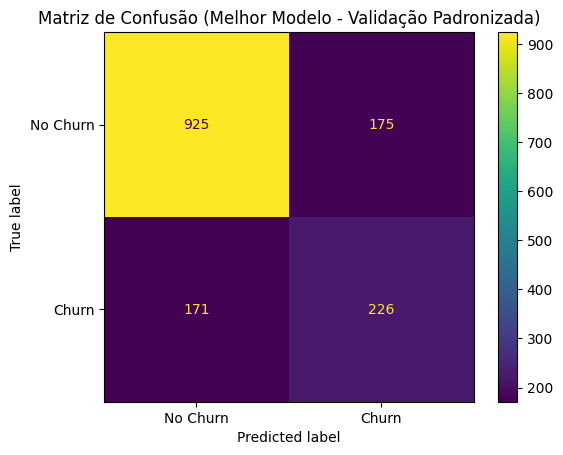

In [101]:
# 5. Avaliar o melhor modelo no conjunto de validação padronizado

# Fazer previsões no conjunto de validação padronizado usando o melhor modelo
y_previsto_melhor_modelo = melhor_modelo.predict(x_val_scaled)

# Calcular e exibir a matriz de confusão
matriz_confusao_melhor_modelo = confusion_matrix(y_val, y_previsto_melhor_modelo)
print("Matriz de Confusão (Melhor Modelo no Conjunto de Validação):")
print(matriz_confusao_melhor_modelo, '\n')

# Visualizar a matriz de confusão
visualizacao_melhor_modelo = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_melhor_modelo, display_labels=['No Churn', 'Churn'])
visualizacao_melhor_modelo.plot()
plt.title('Matriz de Confusão (Melhor Modelo - Validação Padronizada)')
plt.show()

In [102]:
# Calcular e exibir as métricas de avaliação para o melhor modelo
print("Métricas de Avaliação (Melhor Modelo no Conjunto de Validação):")
print(f'Acurácia: {accuracy_score(y_val, y_previsto_melhor_modelo)}')
print(f'Precisão: {precision_score(y_val, y_previsto_melhor_modelo)}')
print(f'Recall  : {recall_score(y_val, y_previsto_melhor_modelo)}')
print(f'F1-score: {f1_score(y_val, y_previsto_melhor_modelo)}')

# Para métricas que exigem probabilidades, como AUC e AP
try:
    y_proba_melhor_modelo = melhor_modelo.predict_proba(x_val_scaled)[:, 1]
    print(f'AUC     : {roc_auc_score(y_val, y_proba_melhor_modelo)}')
    print(f'AP      : {average_precision_score(y_val, y_proba_melhor_modelo)}')
except AttributeError:
    print("O modelo não possui o método predict_proba para calcular AUC e AP.")


# Relatório de classificação completo
print("\nRelatório de Classificação (Melhor Modelo no Conjunto de Validação):")
print(classification_report(y_val, y_previsto_melhor_modelo))

Métricas de Avaliação (Melhor Modelo no Conjunto de Validação):
Acurácia: 0.7688710754843019
Precisão: 0.5635910224438903
Recall  : 0.5692695214105793
F1-score: 0.5664160401002506
AUC     : 0.7854064575223265
AP      : 0.5258659264225807

Relatório de Classificação (Melhor Modelo no Conjunto de Validação):
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1100
         1.0       0.56      0.57      0.57       397

    accuracy                           0.77      1497
   macro avg       0.70      0.71      0.70      1497
weighted avg       0.77      0.77      0.77      1497



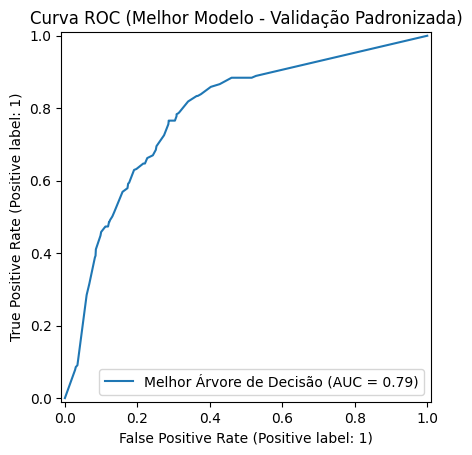

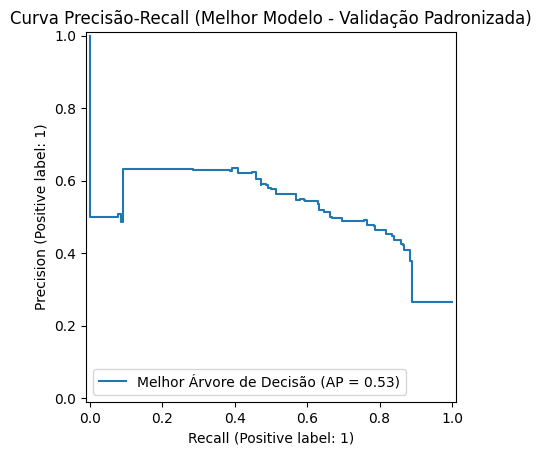

In [103]:
# Plotar Curvas ROC e Precisão-Recall para o melhor modelo

# Verificar se o modelo possui predict_proba antes de plotar
if hasattr(melhor_modelo, 'predict_proba'):
    y_proba_melhor_modelo = melhor_modelo.predict_proba(x_val_scaled)[:, 1]

    # Curva ROC
    RocCurveDisplay.from_predictions(y_val, y_proba_melhor_modelo, name='Melhor Árvore de Decisão');
    plt.title('Curva ROC (Melhor Modelo - Validação Padronizada)')
    plt.show()

    # Curva de Precisão-Recall
    PrecisionRecallDisplay.from_predictions(y_val, y_proba_melhor_modelo, name='Melhor Árvore de Decisão');
    print('\n')
    plt.title('Curva Precisão-Recall (Melhor Modelo - Validação Padronizada)')
    plt.show()
else:
    print("O melhor modelo não possui o método predict_proba. Não é possível plotar as curvas ROC e Precisão-Recall com base nas probabilidades.")

#Segundo modelo - Regressãoi Logistica

Modelo de Regressão Logística nos dados que foram balanceados (usando SMOTE) e padronizados (usando StandardScaler).

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay, classification_report

# Inicializa o modelo de Regressão Logística
modelo_reg_log = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' é bom para pequenos datasets e L1/L2 penalidades

# Treina o modelo com os dados de treino balanceados e padronizados
modelo_reg_log.fit(x_balanceado_scaled, y_balanceado)

print("Modelo de Regressão Logística treinado com dados balanceados e padronizados.")

Modelo de Regressão Logística treinado com dados balanceados e padronizados.


## Avaliando a Regressão Logística com Dados de Validação Padronizados

Matriz de Confusão (Regressão Logística no Conjunto de Validação):
[[826 274]
 [ 90 307]] 



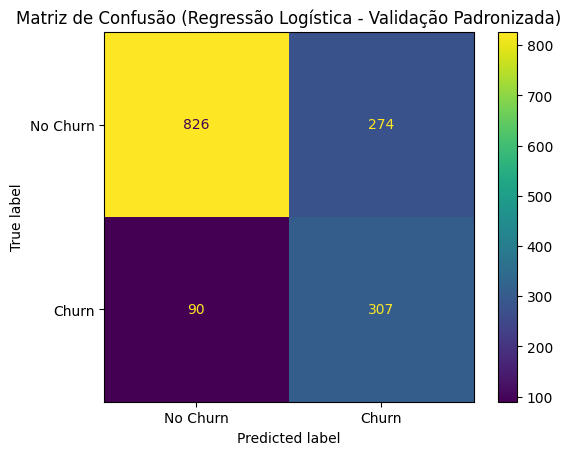


Métricas de Avaliação (Regressão Logística no Conjunto de Validação):
Acurácia: 0.7568470273881096
Precisão: 0.5283993115318416
Recall  : 0.7732997481108312
F1-score: 0.6278118609406953
AUC     : 0.8409319899244333
AP      : 0.6593549923009482

Relatório de Classificação (Regressão Logística no Conjunto de Validação):
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1100
         1.0       0.53      0.77      0.63       397

    accuracy                           0.76      1497
   macro avg       0.72      0.76      0.72      1497
weighted avg       0.80      0.76      0.77      1497



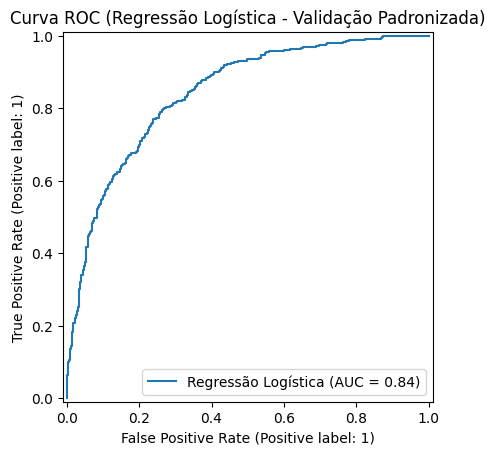


 > ------------------------------------------------------------------------------------------ 



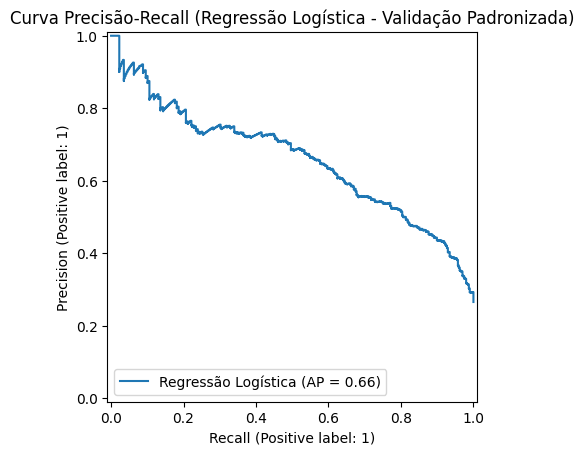

In [105]:
# Previsões nos dados de validação padronizados
y_previsto_reg_log = modelo_reg_log.predict(x_val_scaled)
y_proba_reg_log = modelo_reg_log.predict_proba(x_val_scaled)[:, 1] # Probabilidades para AUC/AP

# Calcula e exibe a matriz de confusão
matriz_confusao_reg_log = confusion_matrix(y_val, y_previsto_reg_log)
print("Matriz de Confusão (Regressão Logística no Conjunto de Validação):")
print(matriz_confusao_reg_log,'\n')

# Visualiza a matriz de confusão
visualizacao_reg_log = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_reg_log, display_labels=['No Churn', 'Churn'])
visualizacao_reg_log.plot()
plt.title('Matriz de Confusão (Regressão Logística - Validação Padronizada)')
plt.show()

# Calcula e exibe as métricas de avaliação
print("\nMétricas de Avaliação (Regressão Logística no Conjunto de Validação):")
print(f'Acurácia: {accuracy_score(y_val, y_previsto_reg_log)}')
print(f'Precisão: {precision_score(y_val, y_previsto_reg_log)}')
print(f'Recall  : {recall_score(y_val, y_previsto_reg_log)}')
print(f'F1-score: {f1_score(y_val, y_previsto_reg_log)}')
print(f'AUC     : {roc_auc_score(y_val, y_proba_reg_log)}')
print(f'AP      : {average_precision_score(y_val, y_proba_reg_log)}')

# Relatório de classificação completo
print("\nRelatório de Classificação (Regressão Logística no Conjunto de Validação):")
print(classification_report(y_val, y_previsto_reg_log))

# Curva ROC
RocCurveDisplay.from_predictions(y_val, y_proba_reg_log, name='Regressão Logística');
plt.title('Curva ROC (Regressão Logística - Validação Padronizada)')
plt.show()
print('\n','>','-'*90,'\n')

# Curva de Precisão-Recall
PrecisionRecallDisplay.from_predictions(y_val, y_proba_reg_log, name='Regressão Logística');
plt.title('Curva Precisão-Recall (Regressão Logística - Validação Padronizada)')
plt.show()

Análise Crítica e Comparação:

Qual modelo teve o melhor desempenho?

A Regressão Logística teve um Recall significativamente maior (0.7733 vs 0.5693). Isso significa que ela foi muito melhor em identificar corretamente os clientes que realmente iriam abandonar (menos Falsos Negativos). Se o custo de não identificar um cliente que vai abandonar é alto para o negócio, a Regressão Logística é superior.
A Árvore de Decisão teve uma Precisão ligeiramente maior (0.5636 vs 0.5284). Isso significa que, quando ela previu que um cliente iria abandonar, ela estava um pouco mais certa do que a Regressão Logística (menos Falsos Positivos, proporcionalmente aos positivos previstos). Se o custo de abordar um cliente que não iria abandonar é alto, a Árvore de Decisão pode ser preferível neste aspecto.
A Regressão Logística também apresentou um F1-score maior (0.6278 vs 0.5664), indicando um melhor equilíbrio geral entre Precisão e Recall.
A Regressão Logística obteve um AUC e AP consideravelmente maiores (AUC: 0.8409 vs 0.7854; AP: 0.6594 vs 0.5259). Estas métricas avaliam a capacidade do modelo de ranquear corretamente as probabilidades das classes, o que é muito importante para problemas de churn onde você pode querer focar os esforços nos clientes com maior probabilidade de sair.
Com base no Recall, F1-score, AUC e AP, a Regressão Logística parece ter um desempenho geral superior para este problema de predição de churn, especialmente se o foco for identificar o máximo possível de clientes em risco.

Algum modelo apresentou overfitting ou underfitting?

Para a Árvore de Decisão, podemos olhar as acurácias de treino e validação (antes do ajuste de hiperparâmetros completo, mas ainda relevante para entender o comportamento):
Acurácia de treino: 0.8926
Acurácia de validação: 0.7635 Há uma diferença considerável entre a acurácia de treino e a de validação (aproximadamente 13%). Isso sugere que a Árvore de Decisão original (com max_depth=10 sem tuning no Grid Search) estava começando a apresentar um certo grau de overfitting, aprendendo detalhes específicos do conjunto de treino que não generalizaram tão bem para o conjunto de validação. O Grid Search tentou mitigar isso otimizando os parâmetros, e o modelo final ajustado teve acurácia de validação de 0.7689, uma pequena melhora. Ainda assim, a diferença entre o score de treino do melhor modelo (que não foi exibido diretamente, mas seria o score na melhor combinação de parâmetros nos folds de treino do CV) e o score de validação final pode indicar algum overfitting remanescente.
Para a Regressão Logística, não calculamos explicitamente a acurácia de treino e validação da mesma forma. No entanto, como a Regressão Logística é um modelo linear, ela é inerentemente menos propensa a overfitting do que modelos baseados em árvores mais complexas como a Árvore de Decisão, especialmente quando os dados estão padronizados. A diferença entre o desempenho na validação cruzada (se você tivesse calculado todas as métricas) e o desempenho no conjunto de validação seria um indicador melhor. Pelo que vimos nas métricas de validação, ela parece generalizar razoavelmente bem. É menos provável que esteja sofrendo de underfitting, dado o Recall e AUC relativamente altos.

#Análise e Importância das Variáveis

#Analises Direcionadas

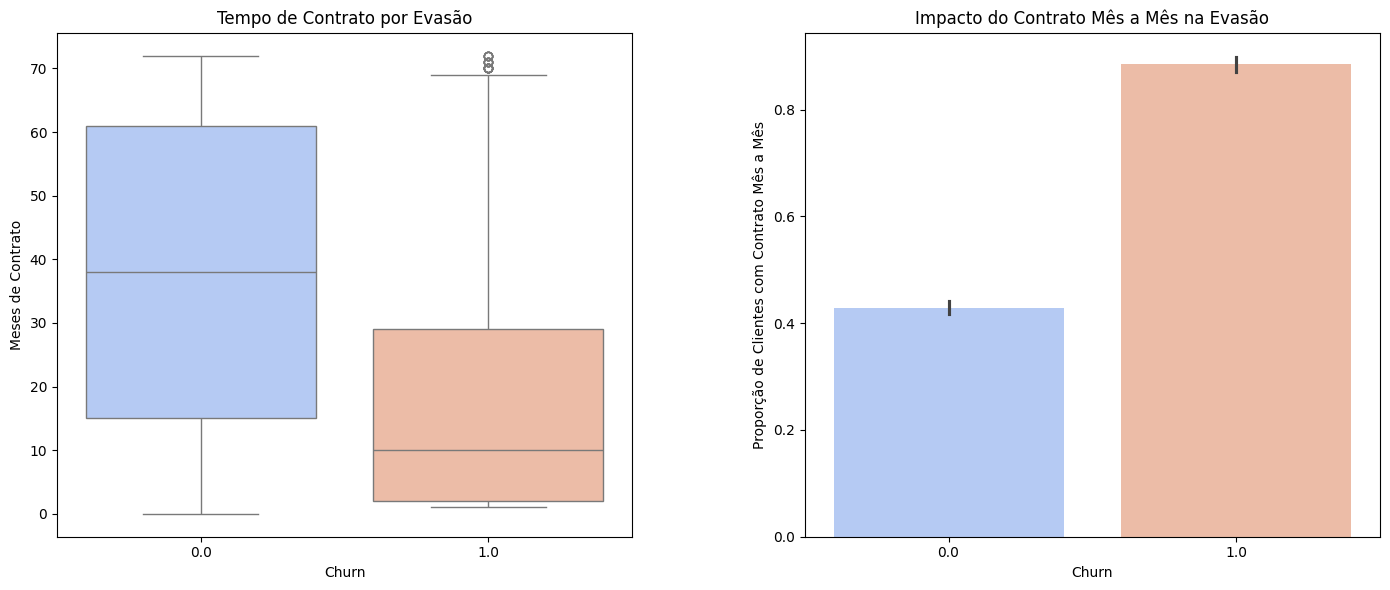

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Boxplot com hue e legend=False para evitar warning
sns.boxplot(ax=axes[0], x='onehotencoder__Churn_Yes', y='remainder__customer.tenure',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[0].set_title('Tempo de Contrato por Evasão',fontsize=12)
axes[0].set_ylabel('Meses de Contrato')
axes[0].set_xlabel('Churn')

sns.barplot(ax=axes[1], x='onehotencoder__Churn_Yes', y='onehotencoder__account.Contract_Month-to-month',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[1].set_title('Impacto do Contrato Mês a Mês na Evasão', fontsize=12) # Título mais descritivo
axes[1].set_ylabel('Proporção de Clientes com Contrato Mês a Mês') # Rótulo mais descritivo
axes[1].set_xlabel('Churn')

plt.tight_layout()

# Aumenta o espaço entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

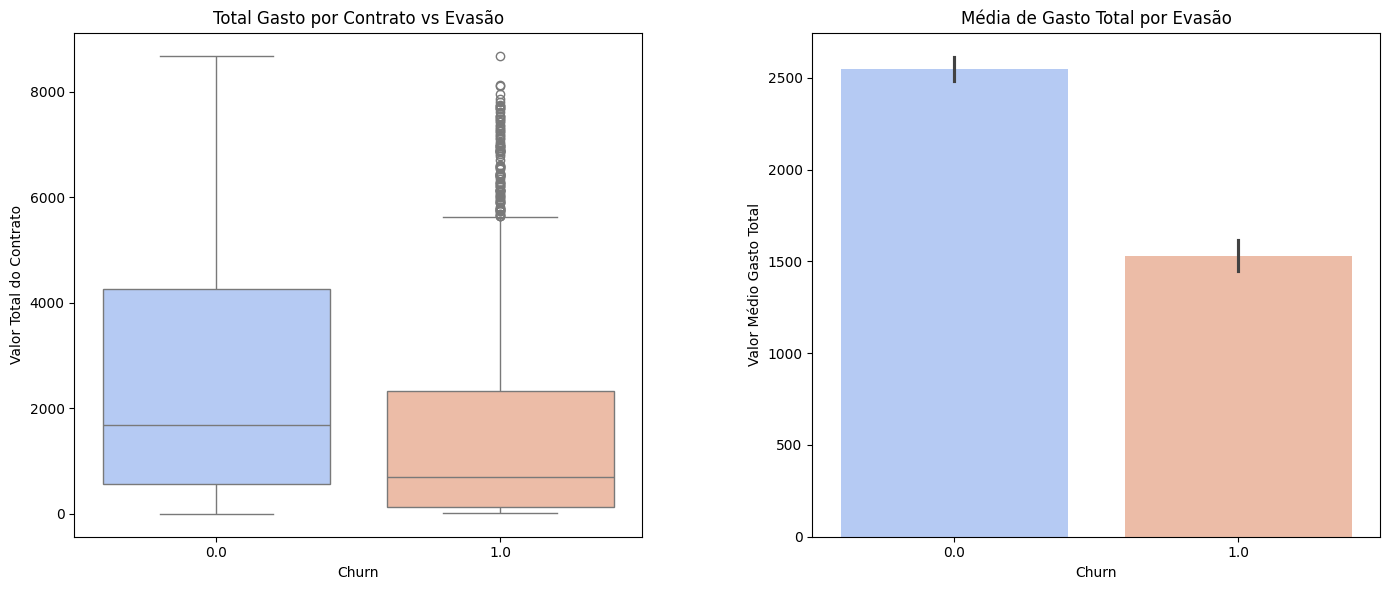

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

sns.boxplot(ax=axes[0], x='onehotencoder__Churn_Yes', y='remainder__account.Charges.Total',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[0].set_title('Total Gasto por Contrato vs Evasão',fontsize=12) # Título corrigido
axes[0].set_ylabel('Valor Total do Contrato') # Rótulo corrigido
axes[0].set_xlabel('Churn')

sns.barplot(ax=axes[1], x='onehotencoder__Churn_Yes', y='remainder__account.Charges.Total',
            hue='onehotencoder__Churn_Yes', palette='coolwarm', data=dados, legend=False)
axes[1].set_title('Média de Gasto Total por Evasão', fontsize=12) # Título mais descritivo
axes[1].set_ylabel('Valor Médio Gasto Total') # Rótulo mais descritivo
axes[1].set_xlabel('Churn')

plt.tight_layout()

#Aumenta o espaço entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### Importância das Variáveis na Árvore de Decisão

Importância das Variáveis (Melhor Árvore de Decisão):


,Feature,Importance
28,onehotencoder__account.Contract_Month-to-month,0.389166
34,onehotencoder__account.PaymentMethod_Electroni...,0.152795
37,remainder__customer.tenure,0.074138
31,onehotencoder__account.PaperlessBilling_Yes,0.049225
10,onehotencoder__internet.OnlineSecurity_No,0.048781
40,remainder__account.Charges.Total,0.047867
38,remainder__Total.Day,0.036183
39,remainder__account.Charges.Monthly,0.032203
21,onehotencoder__internet.TechSupport_Yes,0.025735
8,onehotencoder__internet.InternetService_Fiber ...,0.022538


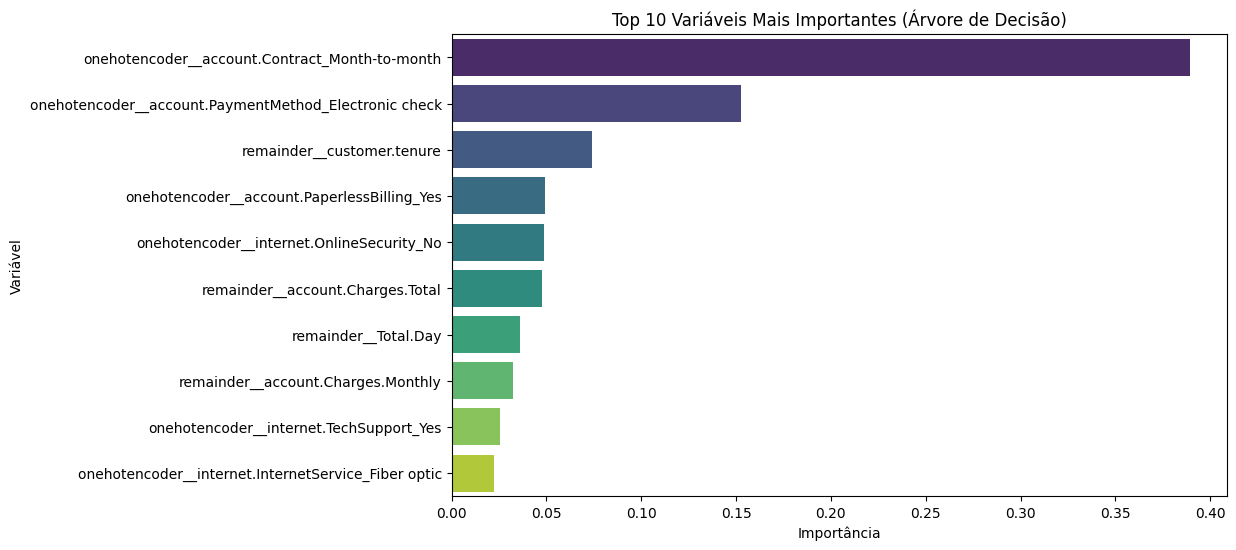

In [108]:
# Obter a importância das variáveis do melhor modelo (Árvore de Decisão)
importances = melhor_modelo.feature_importances_

# Obter os nomes das colunas (variáveis)
feature_names = x_balanceado_scaled.columns

# Criar um DataFrame para visualizar a importância das variáveis
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar as variáveis por importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as variáveis mais importantes
print("Importância das Variáveis (Melhor Árvore de Decisão):")
display(importance_df.head(10)) # Exibe as 10 variáveis mais importantes

# Opcional: Visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Feature', palette='viridis', legend=False) # Corrigido para incluir 'hue' e 'legend=False'
plt.title('Top 10 Variáveis Mais Importantes (Árvore de Decisão)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

### Coeficientes na Regressão Logística

Para a Regressão Logística, a magnitude dos coeficientes indica a força da relação entre a variável e a probabilidade de churn (em escala logarítmica). O sinal indica a direção da relação (positivo = aumenta a probabilidade de churn, negativo = diminui). Vamos olhar para o valor absoluto dos coeficientes para identificar as variáveis com maior impacto.

Coeficientes das Variáveis (Regressão Logística - Top 10 por valor absoluto):


,Feature,Coefficient,Abs_Coefficient
37,remainder__customer.tenure,-1.476774,1.476774
39,remainder__account.Charges.Monthly,-1.027869,1.027869
40,remainder__account.Charges.Total,0.722256,0.722256
8,onehotencoder__internet.InternetService_Fiber ...,0.432249,0.432249
7,onehotencoder__internet.InternetService_DSL,-0.380801,0.380801
28,onehotencoder__account.Contract_Month-to-month,0.272778,0.272778
30,onehotencoder__account.Contract_Two year,-0.243002,0.243002
31,onehotencoder__account.PaperlessBilling_Yes,0.196867,0.196867
27,onehotencoder__internet.StreamingMovies_Yes,0.162727,0.162727
24,onehotencoder__internet.StreamingTV_Yes,0.156422,0.156422


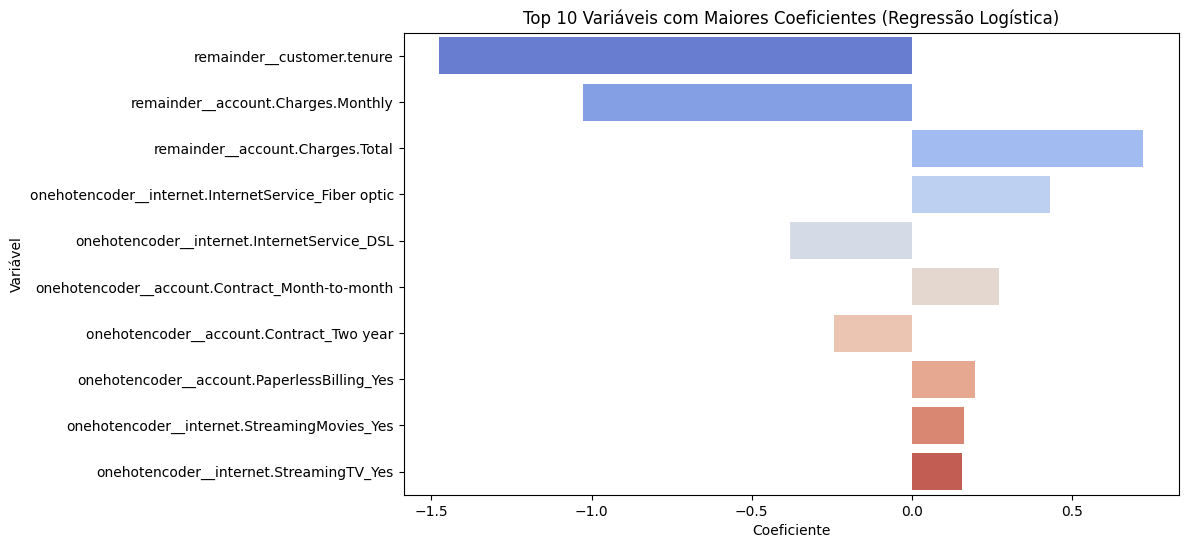

In [109]:
# Obter os coeficientes do modelo de Regressão Logística
coefficients = modelo_reg_log.coef_[0] # Coeficientes para a classe positiva (Churn)

# Obter os nomes das colunas (variáveis)
feature_names = x_balanceado_scaled.columns

# Criar um DataFrame para visualizar os coeficientes
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Adicionar o valor absoluto dos coeficientes para ordenação
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])

# Ordenar as variáveis por valor absoluto do coeficiente em ordem decrescente
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Exibir as variáveis com maiores coeficientes (em valor absoluto)
print("Coeficientes das Variáveis (Regressão Logística - Top 10 por valor absoluto):")
display(coefficients_df.head(10))

# Opcional: Visualizar os coeficientes das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df.head(10), hue='Feature', palette='coolwarm', legend=False) # Corrigido para incluir 'hue' e 'legend=False'
plt.title('Top 10 Variáveis com Maiores Coeficientes (Regressão Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

## Analise de variaveis importantes

In [110]:
# Analisar as 10 variáveis mais importantes da Árvore de Decisão
print("Análise das 10 Variáveis Mais Importantes da Árvore de Decisão:")
display(importance_df.head(10))
print("\nPrincipais observações:")
print("- A variável 'onehotencoder__account.Contract_Month-to-month' possui de longe o maior score de importância, indicando que é a característica mais influente para a Árvore de Decisão.")
print("- 'onehotencoder__account.PaymentMethod_Electronic_check' é a segunda variável mais importante.")
print("- 'remainder__customer.tenure', 'onehotencoder__account.PaperlessBilling_Yes' e 'onehotencoder__internet.OnlineSecurity_No' também mostram importância significativa.")
print("- Outras variáveis como 'remainder__account.Charges.Total', 'remainder__Total.Day', 'remainder__account.Charges.Monthly', 'onehotencoder__internet.TechSupport_Yes' e 'onehotencoder__internet.InternetService_Fiber optic' também estão no top 10, mas com scores de importância menores.")

# Analisar os coeficientes absolutos do top 10 da Regressão Logística
print("\nAnálise das 10 Variáveis com Maiores Coeficientes (valor absoluto) da Regressão Logística:")
display(coefficients_df.head(10))
print("\nPrincipais observações:")
print("- 'remainder__customer.tenure' possui o maior coeficiente absoluto (negativo), indicando uma forte relação negativa com a evasão (maior tempo de contrato significa menos evasão).")
print("- 'remainder__account.Charges.Monthly' também possui um grande coeficiente negativo.")
print("- 'remainder__account.Charges.Total' possui um grande coeficiente positivo, sugerindo que maiores cobranças totais estão associadas a maior evasão.")
print("- 'onehotencoder__internet.InternetService_Fiber optic' e 'onehotencoder__internet.InternetService_DSL' mostram coeficientes significativos (positivo para Fiber optic, negativo para DSL).")
print("- 'onehotencoder__account.Contract_Month-to-month' e 'onehotencoder__account.Contract_Two year' possuem coeficientes notáveis (positivo para Month-to-month, negativo para Two year).")
print("- 'onehotencoder__account.PaperlessBilling_Yes', 'onehotencoder__internet.StreamingMovies_Yes' e 'onehotencoder__internet.StreamingTV_Yes' também aparecem no top 10 com coeficientes positivos.")

# Comparar as variáveis do top de ambos os modelos
print("\nComparação das Principais Variáveis da Árvore de Decisão e Regressão Logística:")
dt_top_features = importance_df.head(10)['Feature'].tolist()
lr_top_features = coefficients_df.head(10)['Feature'].tolist()
common_features = list(set(dt_top_features) & set(lr_top_features))
print(f"- Variáveis comuns no top 10 de ambos os modelos: {common_features}")
print("\nEstas variáveis comuns ('remainder__customer.tenure', 'onehotencoder__account.Contract_Month-to-month', 'onehotencoder__account.PaperlessBilling_Yes', 'remainder__account.Charges.Total', 'remainder__account.Charges.Monthly', 'onehotencoder__internet.InternetService_Fiber optic') são provavelmente as características mais consistentemente influentes para a previsão de evasão, independentemente do tipo de modelo.")

# Resumir as variáveis influentes chave e suas potenciais interpretações
print("\nResumo das Variáveis Influentes Chave para a Previsão de Evasão:")
print("- **Tipo de Contrato (Mês a Mês):** Ambos os modelos destacam contratos mês a mês como um dos principais impulsionadores da evasão. Clientes em contratos mais curtos e flexíveis têm maior probabilidade de sair.")
print("- **Tempo de Contrato (Tenure):** Ambos os modelos mostram que um tempo de contrato mais longo está fortemente associado a menor evasão. Clientes leais e de longo prazo têm menor probabilidade de sair.")
print("- **Cobranças Mensais e Totais:** Ambos os modelos indicam que cobranças mais altas (tanto mensais quanto totais) estão ligadas a maior evasão, sugerindo que o custo é um fator significativo.")
print("- **Serviço de Internet (Fiber optic vs DSL):** A Regressão Logística aponta especificamente que o serviço Fiber optic está associado a maior evasão em comparação com o DSL, potencialmente indicando problemas de qualidade do serviço ou custos mais elevados com Fiber optic.")
print("- **Segurança Online e Suporte Técnico (Ausência):** A Árvore de Decisão destaca a falta de segurança online como importante, enquanto a Regressão Logística nota a ausência de suporte técnico (implícito pelo coeficiente positivo para 'TechSupport_No'). Clientes sem esses recursos de segurança/suporte podem ter maior probabilidade de evasão.")
print("- **Faturamento sem Papel (Paperless Billing):** Ambos os modelos sugerem que clientes com faturamento sem papel têm maior probabilidade de evasão. Isso pode ser um indicador indireto de familiaridade com tecnologia ou preferência por interações digitais, o que pode se correlacionar com outros fatores que influenciam a evasão.")
print("- **Método de Pagamento (Cheque Eletrônico):** Ambos os modelos, mas especialmente a Árvore de Decisão, identificam o cheque eletrônico como um método de pagamento fortemente associado à evasão. Isso pode estar ligado a clientes menos engajados ou com arranjos de pagamento menos estáveis.")
print("- **Serviços de Streaming (TV e Filmes):** A Regressão Logística sugere que ter serviços de streaming (TV e Filmes) está positivamente associado à evasão, embora sua importância seja menor do que as variáveis principais.")

print("\nEstas variáveis fornecem insights valiosos sobre as características dos clientes com maior probabilidade de evasão, o que pode subsidiar estratégias de retenção direcionadas.")

Análise das 10 Variáveis Mais Importantes da Árvore de Decisão:


,Feature,Importance
28,onehotencoder__account.Contract_Month-to-month,0.389166
34,onehotencoder__account.PaymentMethod_Electroni...,0.152795
37,remainder__customer.tenure,0.074138
31,onehotencoder__account.PaperlessBilling_Yes,0.049225
10,onehotencoder__internet.OnlineSecurity_No,0.048781
40,remainder__account.Charges.Total,0.047867
38,remainder__Total.Day,0.036183
39,remainder__account.Charges.Monthly,0.032203
21,onehotencoder__internet.TechSupport_Yes,0.025735
8,onehotencoder__internet.InternetService_Fiber ...,0.022538



Principais observações:
- A variável 'onehotencoder__account.Contract_Month-to-month' possui de longe o maior score de importância, indicando que é a característica mais influente para a Árvore de Decisão.
- 'onehotencoder__account.PaymentMethod_Electronic_check' é a segunda variável mais importante.
- 'remainder__customer.tenure', 'onehotencoder__account.PaperlessBilling_Yes' e 'onehotencoder__internet.OnlineSecurity_No' também mostram importância significativa.
- Outras variáveis como 'remainder__account.Charges.Total', 'remainder__Total.Day', 'remainder__account.Charges.Monthly', 'onehotencoder__internet.TechSupport_Yes' e 'onehotencoder__internet.InternetService_Fiber optic' também estão no top 10, mas com scores de importância menores.

Análise das 10 Variáveis com Maiores Coeficientes (valor absoluto) da Regressão Logística:


,Feature,Coefficient,Abs_Coefficient
37,remainder__customer.tenure,-1.476774,1.476774
39,remainder__account.Charges.Monthly,-1.027869,1.027869
40,remainder__account.Charges.Total,0.722256,0.722256
8,onehotencoder__internet.InternetService_Fiber ...,0.432249,0.432249
7,onehotencoder__internet.InternetService_DSL,-0.380801,0.380801
28,onehotencoder__account.Contract_Month-to-month,0.272778,0.272778
30,onehotencoder__account.Contract_Two year,-0.243002,0.243002
31,onehotencoder__account.PaperlessBilling_Yes,0.196867,0.196867
27,onehotencoder__internet.StreamingMovies_Yes,0.162727,0.162727
24,onehotencoder__internet.StreamingTV_Yes,0.156422,0.156422



Principais observações:
- 'remainder__customer.tenure' possui o maior coeficiente absoluto (negativo), indicando uma forte relação negativa com a evasão (maior tempo de contrato significa menos evasão).
- 'remainder__account.Charges.Monthly' também possui um grande coeficiente negativo.
- 'remainder__account.Charges.Total' possui um grande coeficiente positivo, sugerindo que maiores cobranças totais estão associadas a maior evasão.
- 'onehotencoder__internet.InternetService_Fiber optic' e 'onehotencoder__internet.InternetService_DSL' mostram coeficientes significativos (positivo para Fiber optic, negativo para DSL).
- 'onehotencoder__account.Contract_Month-to-month' e 'onehotencoder__account.Contract_Two year' possuem coeficientes notáveis (positivo para Month-to-month, negativo para Two year).
- 'onehotencoder__account.PaperlessBilling_Yes', 'onehotencoder__internet.StreamingMovies_Yes' e 'onehotencoder__internet.StreamingTV_Yes' também aparecem no top 10 com coeficientes positivos.


##Avaliar o melhor modelo no conjunto de teste
Avaliar o modelo com melhor desempenho no conjunto de validação no conjunto de teste não visto e relatar suas métricas de desempenho.


Métricas de Avaliação (Melhor Modelo no Conjunto de Teste):
Acurácia: 0.7493
Precisão: 0.5254
Recall  : 0.5536
F1-score: 0.5391
AUC     : 0.7598
AP      : 0.4948

Matriz de Confusão (Melhor Modelo no Conjunto de Teste):
[[637 140]
 [125 155]] 



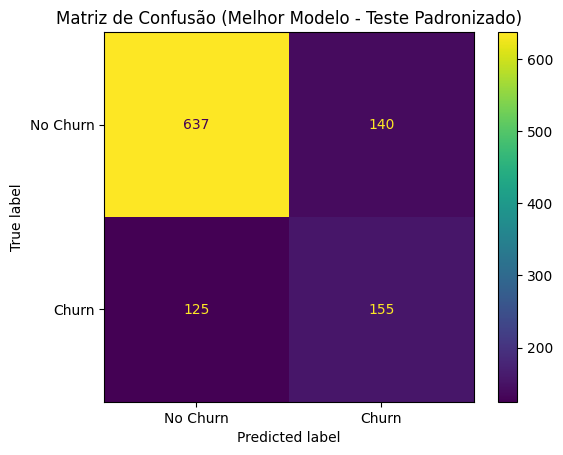


Relatório de Classificação (Melhor Modelo no Conjunto de Teste):
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       777
         1.0       0.53      0.55      0.54       280

    accuracy                           0.75      1057
   macro avg       0.68      0.69      0.68      1057
weighted avg       0.75      0.75      0.75      1057



In [111]:
# 1. Fazer previsões no conjunto de teste usando o melhor modelo
y_previsto_teste = melhor_modelo.predict(x_teste_scaled)

# 2. Obter probabilidades previstas para a classe positiva no conjunto de teste
if hasattr(melhor_modelo, 'predict_proba'):
    y_proba_teste = melhor_modelo.predict_proba(x_teste_scaled)[:, 1]
else:
    y_proba_teste = None
    print("Aviso: O melhor modelo não possui o método predict_proba. AUC e AP não podem ser calculados.")

# 3. Calcular e imprimir métricas de avaliação
print("Métricas de Avaliação (Melhor Modelo no Conjunto de Teste):")
print(f'Acurácia: {accuracy_score(y_teste, y_previsto_teste):.4f}')
print(f'Precisão: {precision_score(y_teste, y_previsto_teste):.4f}')
print(f'Recall  : {recall_score(y_teste, y_previsto_teste):.4f}')
print(f'F1-score: {f1_score(y_teste, y_previsto_teste):.4f}')

if y_proba_teste is not None:
    print(f'AUC     : {roc_auc_score(y_teste, y_proba_teste):.4f}')
    print(f'AP      : {average_precision_score(y_teste, y_proba_teste):.4f}')
else:
    print("AUC e AP não calculados devido à falta do método predict_proba.")

# 4. Gerar e exibir a matriz de confusão
matriz_confusao_teste = confusion_matrix(y_teste, y_previsto_teste)
print("\nMatriz de Confusão (Melhor Modelo no Conjunto de Teste):")
print(matriz_confusao_teste, '\n')

visualizacao_teste = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_teste, display_labels=['No Churn', 'Churn'])
visualizacao_teste.plot()
plt.title('Matriz de Confusão (Melhor Modelo - Teste Padronizado)')
plt.show()

# 5. Imprimir relatório de classificação
print("\nRelatório de Classificação (Melhor Modelo no Conjunto de Teste):")
print(classification_report(y_teste, y_previsto_teste))

#modelo para testar

In [112]:
# Exemplo de novos dados para predição (substitua por seus dados reais)
# Certifique-se de que as colunas e seus tipos de dados correspondem ao DataFrame de treino original
# antes da remoção do customerID e encoding.
# Não inclua a coluna 'Churn' nestes novos dados.
novo_dado = pd.DataFrame({
    'customerID': ['0001-XXXXX', '0002-YYYYY'],
    'customer.gender': ['Female', 'Male'],
    'customer.SeniorCitizen': [0, 1],
    'customer.Partner': ['No', 'Yes'],
    'customer.Dependents': ['No', 'No'],
    'customer.tenure': [1, 24],
    'phone.PhoneService': ['Yes', 'Yes'],
    'phone.MultipleLines': ['No', 'Yes'],
    'internet.InternetService': ['Fiber optic', 'DSL'],
    'internet.OnlineSecurity': ['No', 'Yes'],
    'internet.OnlineBackup': ['Yes', 'No'],
    'internet.DeviceProtection': ['No', 'Yes'],
    'internet.TechSupport': ['No', 'Yes'],
    'internet.StreamingTV': ['Yes', 'Yes'],
    'internet.StreamingMovies': ['No', 'Yes'],
    'account.Contract': ['Month-to-month', 'Two year'],
    'account.PaperlessBilling': ['Yes', 'No'],
    'account.PaymentMethod': ['Electronic check', 'Credit card (automatic)'],
    'Total.Day': [2.5, 1.8],
    'account.Charges.Monthly': [95.0, 60.0],
    'account.Charges.Total': [95.0, 1440.0]
})

In [113]:
dados.columns

Index(['onehotencoder__Churn_Yes', 'onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No interne

#Aplicando o modelo

## Transformando Novos Dados para Predição

### Subtarefa:
Transformar o dicionário `novo_dado` em um DataFrame preprocessado (encoded e scaled) utilizando as etapas de pré-processamento definidas anteriormente, para que esteja pronto para ser usado com o modelo treinado.

**Reasoning**:
Transform the `novo_dado` dictionary into a preprocessed DataFrame using the previously defined `preprocess_new_data` function, which applies encoding and scaling and ensures column consistency.

In [114]:
# Certifique-se de que o dicionário novo_dado está definido (como na célula mx8ujSLAqbqu)
# e que as funções/objetos de pré-processamento (preprocess_new_data, one_hot, scaler,
# training_feature_names_for_prediction, x_balanceado_scaled) foram definidos e ajustados/carregados.

# 1. Converter o dicionário novo_dado para um DataFrame pandas
novo_df = pd.DataFrame(novo_dado)

# 2. Remover a coluna 'customerID' (conforme feito no treino)
novo_df_processed = novo_df.drop('customerID', axis=1)

# 3. Pré-processar os novos dados usando a função definida anteriormente
try:
    # A função preprocess_new_data lida com o encoding, alinhamento de colunas e scaling
    # Passamos o DataFrame processado (sem customerID), os objetos one_hot e scaler ajustados,
    # e a lista de nomes de features esperados após o encoding (sem a target).
    novo_dados_prontos_para_predicao = preprocess_new_data(
        novo_df_processed,
        one_hot,
        scaler,
        training_feature_names_for_prediction # Esta lista foi definida na célula 42f7d1d0
    )

    print("Novos dados transformados e prontos para predição:")
    display(novo_dados_prontos_para_predicao.head())

    # Agora você pode usar 'novo_dados_prontos_para_predicao' com o modelo carregado ('loaded_model')
    # Exemplo (opcional, se quiser rodar a predição logo após a transformação):
    # if 'loaded_model' in locals(): # Verifica se o modelo carregado existe
    #     predictions = loaded_model.predict(novo_dados_prontos_para_predicao)
    #     print("\nPrevisões:")
    #     print(predictions)
    # else:
    #     print("\nModelo carregado ('loaded_model') não encontrado. Carregue o modelo primeiro para fazer predições.")


except NameError as e:
    print(f"\nErro: {e}. Certifique-se de que 'novo_dado', 'preprocess_new_data', 'one_hot', 'scaler', 'training_feature_names_for_prediction' e 'x_balanceado_scaled' foram definidos e ajustados/carregados antes de executar este código.")
except Exception as e:
    print(f"\nOcorreu um erro durante a transformação dos dados: {e}")

Novos dados transformados e prontos para predição:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.510050,-1.095302,0.248134,0.949177,-0.882603
1,1.053290,1.186046,-0.610713,0.326235,-0.992730,-0.326235,1.189289,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,2.192939,-0.887190,-0.538003,2.223091,-0.131154,-0.485534,-0.280686,-0.258483


In [115]:
# Assumindo que 'one_hot' e 'scaler' foram definidos e ajustados anteriormente no notebook
# 'one_hot' é o objeto ColumnTransformer usado para One-Hot Encoding (ajustado nos features de treino)
# 'scaler' é o objeto StandardScaler ajustado nos dados de treino balanceados

# Obter os nomes das colunas dos features APÓS o one-hot encoding diretamente do transformer
# E remover o nome da coluna 'Churn' se existir, pois novos dados para predição não a terão.
# Esta lista será usada para garantir que o DataFrame final tenha as colunas corretas para o scaler/modelo.
all_encoded_feature_names = one_hot.get_feature_names_out()
training_feature_names_for_prediction = [
    name for name in all_encoded_feature_names if name != 'onehotencoder__Churn_Yes' and name != 'onehotencoder__Churn_No' # Remover ambas as colunas Churn codificadas, se existirem
]

def preprocess_new_data(new_data_df, one_hot_encoder, scaler_fitted, feature_names_for_prediction):
    """
    Preprocessa novos dados para predição usando o encoder e scaler ajustados,
    garantindo que os nomes e o número de colunas correspondam aos dados de treino
    usados pelo modelo (excluindo a coluna target).

    Args:
        new_data_df (pd.DataFrame): DataFrame contendo os novos dados brutos (sem 'Churn' e 'customerID').
        one_hot_encoder: O objeto ColumnTransformer (fitted nos features de treino) usado para encoding.
        scaler_fitted: O objeto StandardScaler (fitted nos dados de treino balanceados) usado para padronização.
        feature_names_for_prediction (list): Lista dos nomes das colunas esperadas nos dados
                                             APÓS o one-hot encoding e ANTES da padronização,
                                             EXCLUINDO as colunas target codificadas ('onehotencoder__Churn_...').

    Returns:
        pd.DataFrame: DataFrame com os novos dados preprocessados (encoded e scaled).
    """
    # --- Contorno para o erro de fit do OneHotEncoder ---
    # Adicionar uma coluna dummy 'Churn' para satisfazer o transformer, se ele foi fitado com 'Churn'.
    # Isso é uma solução temporária porque o transformer não foi ajustado corretamente (apenas em features).
    temp_df_for_encoding = new_data_df.copy()
    if 'Churn' not in temp_df_for_encoding.columns:
         # Adiciona a coluna 'Churn' com um valor qualquer que não interfira (e.g., 'No')
         # O valor exato não importa para a transformação dos outros features,
         # mas a coluna precisa existir.
         temp_df_for_encoding['Churn'] = 'No' # Ou 'Yes', ou 0, 1 dependendo do tipo original

    # Aplicar One-Hot Encoding no DataFrame temporário
    # Agora, o transformador deve encontrar a coluna 'Churn'.
    new_data_encoded = one_hot_encoder.transform(temp_df_for_encoding)
    # --- Fim do Contorno ---


    # Obter todos os nomes de coluna após o one-hot encoding do transformer (baseado no fit original)
    all_encoded_feature_names = one_hot_encoder.get_feature_names_out()

    # Converter para DataFrame usando TODOS os nomes de coluna gerados pelo transformer
    # Isso inclui 'onehotencoder__Churn_No' e 'onehotencoder__Churn_Yes' se o transformer foi fitado com 'Churn'.
    temp_encoded_df = pd.DataFrame(new_data_encoded, columns=all_encoded_feature_names)

    # Remover as colunas codificadas da variável target ('onehotencoder__Churn_...')
    # porque o modelo foi treinado sem elas.
    columns_to_drop_after_encoding = [col for col in temp_encoded_df.columns if col.startswith('onehotencoder__Churn_')]
    new_data_encoded_df = temp_encoded_df.drop(columns=columns_to_drop_after_encoding, errors='ignore') # Use errors='ignore' para evitar erro se a coluna já não existir

    # Garantir que as colunas correspondem exatamente às colunas usadas para treinar o modelo
    # (as colunas de x_balanceado_scaled)
    # Isso lida com casos onde novas categorias podem estar faltando ou a ordem pode ser diferente.
    expected_columns_for_scaling = x_balanceado_scaled.columns # Estas são as colunas que o scaler e o modelo esperam
    new_data_aligned = new_data_encoded_df.reindex(columns=expected_columns_for_scaling, fill_value=0)


    # Aplicar Padronização
    # O scaler espera o mesmo número de features que ele foi treinado (x_balanceado_scaled tinha 41 colunas)
    new_data_scaled = scaler_fitted.transform(new_data_aligned)

    # Converter de volta para DataFrame para manter nomes das colunas
    # As colunas aqui devem ser as mesmas que x_balanceado_scaled
    scaled_feature_names = x_balanceado_scaled.columns
    new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=scaled_feature_names)

    return new_data_scaled_df

print("Função preprocess_new_data redefinida com contorno para o erro de fit do OneHotEncoder.")

# Agora, crie os novos dados de exemplo para predição
# (Manter a definição do dicionário sample_new_data e a conversão para DataFrame)
sample_new_data = {
    'customerID': ['0001-XXXXX', '0002-YYYYY'],
    'customer.gender': ['Female', 'Male'],
    'customer.SeniorCitizen': [0, 1],
    'customer.Partner': ['No', 'Yes'],
    'customer.Dependents': ['No', 'No'],
    'customer.tenure': [1, 24],
    'phone.PhoneService': ['Yes', 'Yes'],
    'phone.MultipleLines': ['No', 'Yes'],
    'internet.InternetService': ['Fiber optic', 'DSL'],
    'internet.OnlineSecurity': ['No', 'Yes'],
    'internet.OnlineBackup': ['Yes', 'No'],
    'internet.DeviceProtection': ['No', 'Yes'],
    'internet.TechSupport': ['No', 'Yes'],
    'internet.StreamingTV': ['Yes', 'Yes'],
    'internet.StreamingMovies': ['No', 'Yes'],
    'account.Contract': ['Month-to-month', 'Two year'],
    'account.PaperlessBilling': ['Yes', 'No'],
    'account.PaymentMethod': ['Electronic check', 'Credit card (automatic)'],
    'Total.Day': [2.5, 1.8],
    'account.Charges.Monthly': [95.0, 60.0],
    'account.Charges.Total': [95.0, 1440.0]
}

sample_new_df = pd.DataFrame(sample_new_data)

print("\nNovos dados de exemplo (brutos):")
display(sample_new_df)

# Remover a coluna 'customerID' dos novos dados
sample_new_df_processed = sample_new_df.drop('customerID', axis=1)

# Preprocessar os novos dados usando a função atualizada e os objetos ajustados
try:
    # Passar a lista de nomes de features que o modelo espera (excluindo a target)
    sample_new_data_scaled_df = preprocess_new_data(sample_new_df_processed, one_hot, scaler, training_feature_names_for_prediction)
    print("\nNovos dados de exemplo (preprocessados e padronizados):")
    display(sample_new_data_scaled_df)

except NameError as e:
    print(f"\nErro: {e}. Certifique-se de que 'one_hot', 'scaler', 'x_balanceado_scaled', e 'x_treino' foram definidos e ajustados/carregados antes de executar este código.")
except Exception as e:
    print(f"\nOcorreu um erro durante a predição: {e}")

Função preprocess_new_data redefinida com contorno para o erro de fit do OneHotEncoder.

Novos dados de exemplo (brutos):


,customerID,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0001-XXXXX,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,2.5,95.0,95.0
1,0002-YYYYY,Male,1,Yes,No,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),1.8,60.0,1440.0



Novos dados de exemplo (preprocessados e padronizados):


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,-1.048618,-0.918859,-0.610713,0.326235,1.084141,-0.326235,-0.899408,-0.680286,0.959799,-0.445379,...,0.760574,-0.496101,-0.491765,1.238215,-0.538003,-0.510050,-1.095302,0.248134,0.949177,-0.882603
1,1.053290,1.186046,-0.610713,0.326235,-0.992730,-0.326235,1.189289,1.514031,-1.063726,-0.445379,...,-1.413290,-0.496101,2.192939,-0.887190,-0.538003,2.223091,-0.131154,-0.485534,-0.280686,-0.258483


## Função para Predição em Novos Dados

Função que encapsula o processo de carregar o modelo salvo, pré-processar novos dados e fazer uma previsão. Isso torna mais fácil usar o modelo em um ambiente de produção ou em scripts separados.

In [116]:
import pickle
import pandas as pd
# Importar as bibliotecas necessárias para o pré-processamento, se ainda não estiverem importadas
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assumindo que a função preprocess_new_data e os objetos one_hot, scaler,
# training_feature_names_for_prediction e x_balanceado_scaled
# foram definidos e ajustados/carregados anteriormente no notebook.

def predict_churn_with_saved_model(new_raw_data_dict):
    """
    Carrega o modelo de churn salvo, pré-processa novos dados brutos e retorna a previsão.

    Args:
        new_raw_data_dict (dict or pd.DataFrame): Dicionário ou DataFrame contendo os dados
                                                  de um ou mais novos clientes no formato original
                                                  (similar ao DataFrame 'df' antes do pré-processamento),
                                                  incluindo 'customerID'.

    Returns:
        list: Lista de previsões ('Churn' ou 'No Churn') para cada cliente.
              Retorna None e imprime um erro se o pré-processamento ou a predição falhar.
    """
    # Define o nome do arquivo do modelo salvo
    model_filename = 'best_churn_model.pkl'

    try:
        # --- 1. Carregar o Modelo ---
        with open(model_filename, 'rb') as f:
            loaded_model = pickle.load(f)
        # print("Modelo carregado com sucesso.") # Opcional: imprimir confirmação

        # --- 2. Preparar os Novos Dados ---
        # Converter o dicionário/DataFrame de entrada para DataFrame pandas, se ainda não for
        if isinstance(new_raw_data_dict, dict):
             new_raw_df = pd.DataFrame(new_raw_data_dict)
        elif isinstance(new_raw_data_dict, pd.DataFrame):
             new_raw_df = new_raw_data_dict.copy()
        else:
             print("Erro: A entrada de dados deve ser um dicionário ou DataFrame pandas.")
             return None

        # Remover a coluna 'customerID' (assumimos que a função de pré-processamento espera isso)
        if 'customerID' in new_raw_df.columns:
            new_data_for_processing = new_raw_df.drop('customerID', axis=1)
        else:
            new_data_for_processing = new_raw_df.copy()
            print("Aviso: Coluna 'customerID' não encontrada nos dados de entrada.")


        # Pré-processar os novos dados usando a função definida anteriormente
        # Depende de 'preprocess_new_data', 'one_hot', 'scaler', 'training_feature_names_for_prediction'
        # estarem disponíveis no ambiente.
        try:
            # A função preprocess_new_data foi ajustada para lidar com o problema de fit do one_hot
            processed_data = preprocess_new_data(
                new_data_for_processing,
                one_hot, # Objeto one_hot ajustado
                scaler, # Objeto scaler ajustado
                training_feature_names_for_prediction # Lista de nomes de features esperados
            )
            # print("Dados pré-processados com sucesso.") # Opcional

        except Exception as e:
            print(f"Erro durante o pré-processamento dos novos dados: {e}")
            print("Por favor, verifique se os objetos 'one_hot', 'scaler', 'training_feature_names_for_prediction' e a função 'preprocess_new_data' estão definidos e ajustados/carregados corretamente.")
            return None


        # --- 3. Fazer a Predição ---
        predictions = loaded_model.predict(processed_data)

        # --- 4. Formatar e Retornar Resultados ---
        # Mapear as previsões de volta para 'Churn' ou 'No Churn'
        churn_mapping = {1.0: 'Churn', 0.0: 'No Churn'}
        predictions_labels = [churn_mapping[pred] for pred in predictions]

        # Opcional: Incluir probabilidades na saída, se o modelo suportar
        if hasattr(loaded_model, 'predict_proba'):
             predictions_proba = loaded_model.predict_proba(processed_data)[:, 1]
             # Você pode retornar algo como uma lista de dicionários ou um DataFrame
             # Exemplo: return [{'customerID': new_raw_df['customerID'].iloc[i] if 'customerID' in new_raw_df.columns else f'Cliente {i+1}', 'Prediction': pred, 'Probability_Churn': prob} for i, (pred, prob) in enumerate(zip(predictions_labels, predictions_proba))]
             # Por simplicidade, vamos retornar apenas as labels por enquanto
             return predictions_labels
        else:
             return predictions_labels


    except FileNotFoundError:
        print(f"Erro: O arquivo do modelo '{model_filename}' não foi encontrado. Certifique-se de que o modelo foi salvo.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro durante a predição: {e}")
        return None

# --- Exemplo de Uso da Função ---
print("Função 'predict_churn_with_saved_model' definida.")

# Use o dicionário sample_new_data que definimos anteriormente


print("\nTestando a função com novos dados de exemplo:")
predictions_example = predict_churn_with_saved_model(sample_new_data)

if predictions_example:
    # Exibir as previsões junto com os Customer IDs originais
    customer_ids = pd.DataFrame(sample_new_data)['customerID'].tolist()
    print("\nResultados da Predição:")
    for i, pred in enumerate(predictions_example):
        print(f"Cliente {customer_ids[i]}: {pred}")
        #print(f"Cliente {customer_ids[i]}: {pred} (Probabilidade de Churn: {prob_churn:.4f})")

Função 'predict_churn_with_saved_model' definida.

Testando a função com novos dados de exemplo:

Resultados da Predição:
Cliente 0001-XXXXX: Churn
Cliente 0002-YYYYY: No Churn


In [117]:
import pickle

# Define o nome do arquivo para salvar o modelo
filename = 'best_churn_model.pkl'

# Abre o arquivo em modo de escrita binária
with open(filename, 'wb') as f:
    # Usa pickle.dump() para salvar o objeto melhor_modelo no arquivo aberto
    pickle.dump(melhor_modelo, f)

# Imprime uma mensagem de confirmação
print(f"Modelo salvo em: {filename}")

Modelo salvo em: best_churn_model.pkl


In [118]:
# Criando um novo DataFrame com 10 clientes de exemplo
novos_dados_10_clientes = pd.DataFrame({
    'customerID': [f'NewCust-{i:03d}' for i in range(1, 11)],
    'customer.gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'customer.SeniorCitizen': [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
    'customer.Partner': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'customer.Dependents': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    'customer.tenure': [1, 5, 10, 15, 20, 25, 30, 40, 50, 60],
    'phone.PhoneService': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
    'phone.MultipleLines': ['No', 'Yes', 'No phone service', 'No', 'Yes', 'No', 'No phone service', 'Yes', 'No', 'Yes'],
    'internet.InternetService': ['Fiber optic', 'DSL', 'DSL', 'Fiber optic', 'No', 'DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL'],
    'internet.OnlineSecurity': ['No', 'Yes', 'Yes', 'No', 'No internet service', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'internet.OnlineBackup': ['Yes', 'No', 'No', 'Yes', 'No internet service', 'No', 'Yes', 'No', 'Yes', 'No'],
    'internet.DeviceProtection': ['No', 'Yes', 'No', 'Yes', 'No internet service', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'internet.TechSupport': ['No', 'Yes', 'No', 'Yes', 'No internet service', 'No', 'Yes', 'No', 'Yes', 'No'],
    'internet.StreamingTV': ['Yes', 'Yes', 'No', 'Yes', 'No internet service', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'internet.StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No internet service', 'No', 'Yes', 'No', 'Yes', 'No'],
    'account.Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year', 'Month-to-month', 'One year', 'Two year', 'Month-to-month', 'One year', 'Two year'],
    'account.PaperlessBilling': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'account.PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],
    'Total.Day': [2.5, 1.8, 1.5, 3.0, 1.0, 2.2, 2.8, 3.5, 2.0, 1.7],
    'account.Charges.Monthly': [95.0, 60.0, 45.0, 105.0, 20.0, 70.0, 85.0, 110.0, 65.0, 55.0],
    'account.Charges.Total': [95.0, 300.0, 450.0, 1500.0, 20.0, 1680.0, 2040.0, 4400.0, 3250.0, 3300.0]
})

print("Novo DataFrame com 10 clientes criado:")
display(novos_dados_10_clientes)

Novo DataFrame com 10 clientes criado:


,customerID,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,NewCust-001,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,2.5,95.0,95.0
1,NewCust-002,Male,1,Yes,No,5,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,1.8,60.0,300.0
2,NewCust-003,Female,0,No,Yes,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1.5,45.0,450.0
3,NewCust-004,Male,0,Yes,No,15,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),3.0,105.0,1500.0
4,NewCust-005,Female,1,No,No,20,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,1.0,20.0,20.0
5,NewCust-006,Male,0,Yes,Yes,25,Yes,No,DSL,Yes,...,Yes,No,Yes,No,One year,No,Mailed check,2.2,70.0,1680.0
6,NewCust-007,Female,0,No,No,30,No,No phone service,Fiber optic,No,...,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),2.8,85.0,2040.0
7,NewCust-008,Male,1,Yes,No,40,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Credit card (automatic),3.5,110.0,4400.0
8,NewCust-009,Female,0,No,Yes,50,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,One year,Yes,Electronic check,2.0,65.0,3250.0
9,NewCust-010,Male,1,Yes,No,60,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Two year,No,Mailed check,1.7,55.0,3300.0


In [119]:
# Usando a função de predição com o novo DataFrame de 10 clientes
print("\nPrevendo Churn para os novos 10 clientes:")
predictions_10_clientes = predict_churn_with_saved_model(novos_dados_10_clientes)

if predictions_10_clientes:
    # Exibir as previsões junto com os Customer IDs originais
    customer_ids_10 = novos_dados_10_clientes['customerID'].tolist()
    print("\nResultados da Predição para 10 Clientes:")
    for i, pred in enumerate(predictions_10_clientes):
        print(f"Cliente {customer_ids_10[i]}: {pred}")


Prevendo Churn para os novos 10 clientes:

Resultados da Predição para 10 Clientes:
Cliente NewCust-001: Churn
Cliente NewCust-002: No Churn
Cliente NewCust-003: No Churn
Cliente NewCust-004: No Churn
Cliente NewCust-005: No Churn
Cliente NewCust-006: No Churn
Cliente NewCust-007: No Churn
Cliente NewCust-008: No Churn
Cliente NewCust-009: Churn
Cliente NewCust-010: No Churn


In [120]:
import json

# O dicionário a ser salvo
# Assumindo que você quer salvar o 'sample_new_data' definido anteriormente.
# Se for outro dicionário, substitua 'sample_new_data' pelo nome correto.
data_to_save = sample_new_data # Substitua pelo nome do seu dicionário, se necessário

# Define o nome do arquivo JSON
filename = 'sample_new_data.json' # Você pode mudar o nome do arquivo aqui

# Salva o dicionário em um arquivo JSON
try:
    with open(filename, 'w', encoding='utf-8') as f:
        # Use indent para formatar o JSON de forma legível
        json.dump(data_to_save, f, indent=4, ensure_ascii=False)

    print(f"Dicionário salvo com sucesso em: {filename}")

except Exception as e:
    print(f"Ocorreu um erro ao salvar o dicionário como JSON: {e}")

Dicionário salvo com sucesso em: sample_new_data.json
